In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import scipy.io.wavfile as siowav
import IPython
from scipy.signal import find_peaks
import sounddevice as sd
import wavio as wv
from scipy import signal

In [2]:
rollno = 224
alpha = 1 + np.mod(rollno,3)

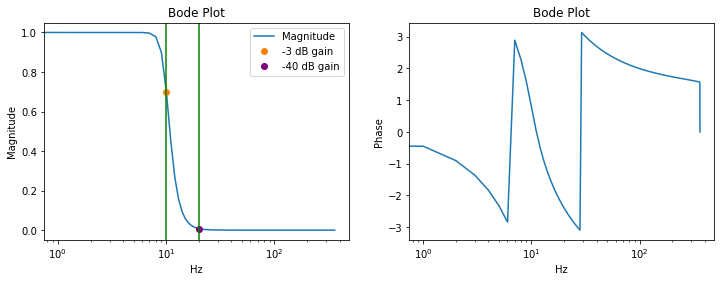

In [15]:
Fs = 720
N, Wn = signal.buttord(1/36, 2/36, 3, 40, analog=False, fs=Fs)
b, a = signal.butter(N, Wn, 'low', analog=False)
w, h = signal.freqz(b, a, fs=Fs, include_nyquist=True, worN=360)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.semilogx(w, (abs(h)))
plt.ylabel('Magnitude')
plt.xlabel('Hz')
plt.semilogx(10,abs(h)[10],'o')
plt.semilogx(20,abs(h)[20],'o', color='purple')
plt.axvline(20, color='green')
plt.axvline(10, color='green')
plt.legend(['Magnitude','-3 dB gain','-40 dB gain'])
plt.title('Bode Plot')

plt.subplot(122)
plt.semilogx(w, np.angle(h))
plt.ylabel('Phase')
plt.xlabel('Hz')
plt.title('Bode Plot')
plt.show()

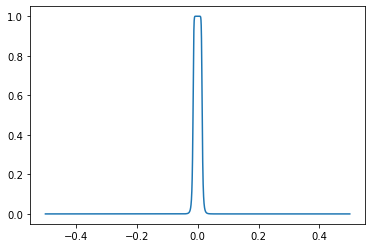

In [4]:
h = np.concatenate((h, np.flip(h)))
omega = np.arange(-0.5, 0.5, 1/len(h))
plt.plot(omega, np.fft.fftshift(abs(h)))

(array([], dtype=float64), array([-0.00618323+0.02709052j, -0.01732504+0.02172491j,
       -0.0250354 +0.01205642j, -0.0277872 -0.j        ,
       -0.0250354 -0.01205642j, -0.01732504-0.02172491j,
       -0.00618323-0.02709052j]), 1.2791271425499053e-11)


Text(0.5, 1.0, 'Pole-Zero Plot')

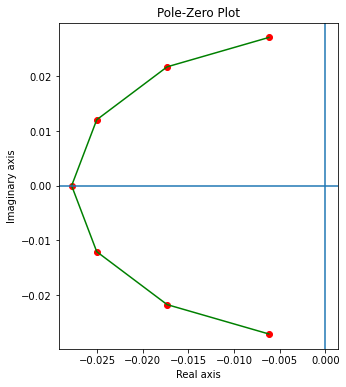

In [5]:
zpk = signal.butter(N, Wn, 'low', analog=True,output='zpk')
print(zpk)
x = []
y = []
for i in range(0,len(zpk[1])):
    x.append(np.real(zpk[1][i]))
    y.append(np.imag(zpk[1][i]))

plt.figure(figsize=(5,6))
plt.scatter(x,y, color='red')
plt.plot(x, y, color='green')
plt.axvline(0)
plt.axhline(0)
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')
plt.title('Pole-Zero Plot')

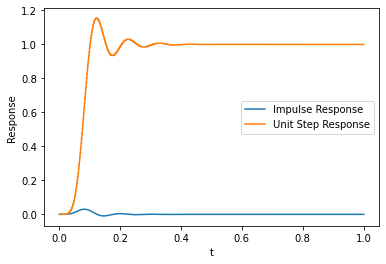

In [6]:
imp = signal.unit_impulse(720)
c, d = signal.butter(N, Wn)
impulse_response = signal.lfilter(c, d, imp)
butter = signal.dlti(c, d)
t, y = signal.dstep(butter, n=720)
t = np.arange(1/720,1+1/720,1/720)
plt.figure()
plt.plot(t,impulse_response)
plt.step(t, np.squeeze(y))
plt.xlabel('t')
plt.ylabel('Response')
plt.legend(['Impulse Response','Unit Step Response'])

## Problem 2

Text(0.5, 1.0, 'ECG Signal')

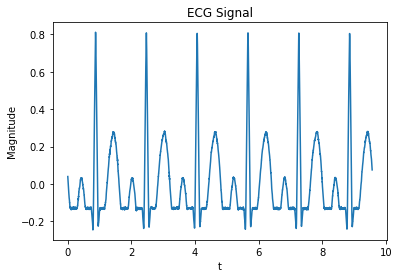

In [7]:
ecg = np.loadtxt('ECG_Data.txt')
ecg = ecg - np.mean(ecg)
t = np.arange(0,len(ecg)/720, 1/720)
plt.plot(t,ecg)
plt.xlabel('t')
plt.ylabel('Magnitude')
plt.title('ECG Signal')

In [8]:
IPython.display.Audio(ecg, rate=7200)

C:\Users\Shreyas\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Shreyas\anaconda3\lib\site-packages\IPython\lib\display.py:157: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


(-0.3, 1.1)

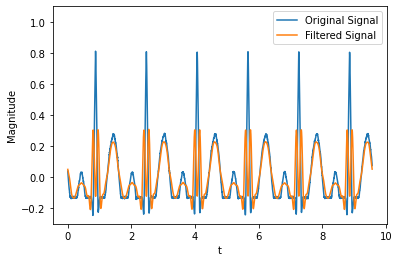

In [9]:
filtered = np.fft.ifft(np.fft.fft(ecg)*h)
plt.plot(t,ecg)
plt.plot(t,filtered)
IPython.display.Audio(filtered, rate=7200)
plt.xlabel('t')
plt.ylabel('Magnitude')
#plt.title('Filtered Signal')
plt.legend(['Original Signal','Filtered Signal'])
plt.ylim([-0.3,1.1])

## Problem 3

In [10]:
Fs, instru3 = siowav.read('instru3.wav')
IPython.display.Audio(instru3, rate=Fs)

Text(0.5, 1.0, 'Spectogram of instrument 3')

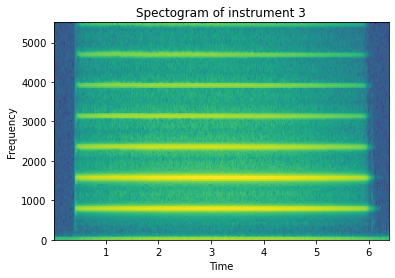

In [11]:
instru3 = np.hamming(len(instru3))*instru3
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(instru3, Fs=Fs)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram of instrument 3')

Text(0.5, 1.0, 'Bode Plot')

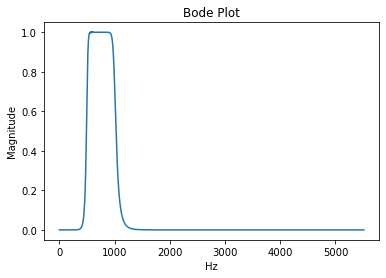

In [12]:
N, Wn = signal.buttord(wp=[1/11,2/11], ws=[0.25/11,2.25/11], gpass=3, gstop=20, analog=False, fs=Fs)
b, a = signal.butter(N, Wn, 'bandpass', analog=False)
w, h = signal.freqz(b, a, fs=Fs, include_nyquist=True, worN=int(len(instru3)/2))

plt.plot(w, abs(h))
plt.ylabel('Magnitude')
plt.xlabel('Hz')
plt.title('Bode Plot')

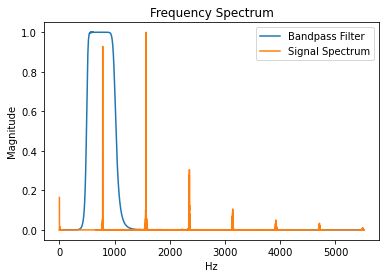

In [14]:
plt.plot(w, abs(h))
plt.plot(w,abs(np.fft.rfft(instru3))[1:]/max(abs(np.fft.rfft(instru3))))
plt.xlabel('Hz')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')
plt.legend(['Bandpass Filter','Signal Spectrum'])

C:\Users\Shreyas\anaconda3\lib\site-packages\IPython\lib\display.py:157: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


Text(0.5, 1.0, 'Spectogram of filtered signal')

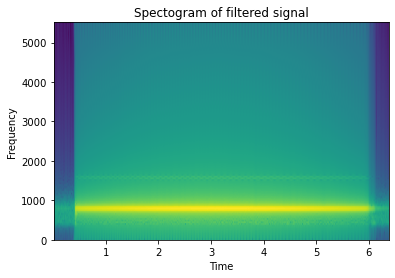

In [33]:
bandpass = np.concatenate((h,np.flip(h)))
bandpass_filtered = np.fft.ifft(np.fft.fft(instru3)*bandpass)
IPython.display.Audio(bandpass_filtered, rate=Fs)
#plt.plot(abs(np.fft.fft(bandpass_filtered)))
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(bandpass_filtered, Fs=Fs, sides='onesided')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram of filtered signal')

C:\Users\Shreyas\anaconda3\lib\site-packages\numpy\fft\_pocketfft.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


Text(0.5, 1.0, 'Frequency spectrum of filtered signal')

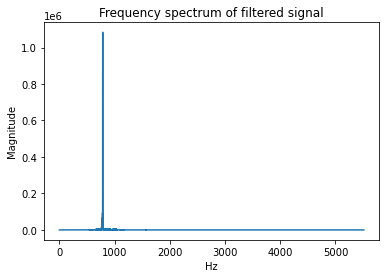

In [44]:
plt.plot(w,abs(np.fft.rfft(bandpass_filtered))[1:])
plt.xlabel('Hz')
plt.ylabel('Magnitude')
plt.title('Frequency spectrum of filtered signal')

## Problem 4

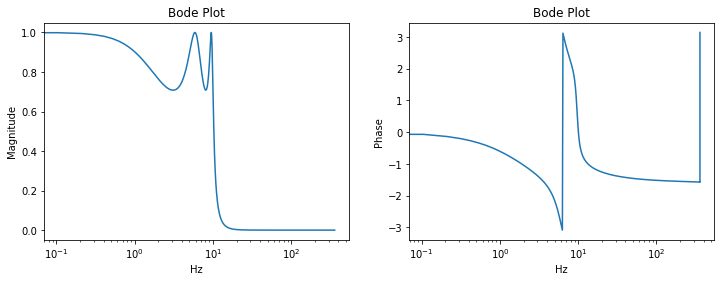

5

In [7]:
Fs = 720
N, Wn = signal.cheb1ord(1/36, 2/36, 3, 40, analog=False, fs=Fs)
b, a = signal.cheby1(N, 3, Wn, 'low', analog=False)
#z, p = signal.bilinear(b, a, 3)
w, h = signal.freqz(b, a, fs=Fs, include_nyquist=True, worN=3442)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.semilogx(w, (abs(h)))
plt.ylabel('Magnitude')
plt.xlabel('Hz')
plt.title('Bode Plot')

plt.subplot(122)
plt.semilogx(w, np.angle(h))
plt.ylabel('Phase')
plt.xlabel('Hz')
plt.title('Bode Plot')
plt.show()
N

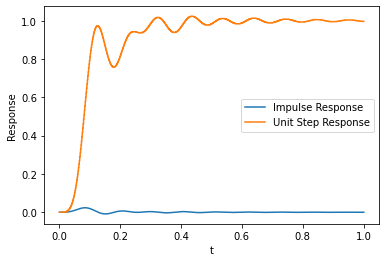

In [10]:
imp = signal.unit_impulse(720)
c, d = signal.cheby1(N, rp=3,Wn=Wn)
impulse_response = signal.lfilter(c, d, imp)
cheby1 = signal.dlti(c, d)
t, y = signal.dstep(cheby1, n=720)
t = np.arange(1/720,1+1/720,1/720)
plt.figure()
plt.plot(t,impulse_response)
plt.step(t, np.squeeze(y))
plt.xlabel('t')
plt.ylabel('Response')
plt.legend(['Impulse Response','Unit Step Response'])